## Linear regression  
## Build a prediction model for Salary_hike Build a simple linear regression model by performing EDA and do necessary transformations 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [3]:
sal=pd.read_csv("c:/users/mahesh/datasetcsv/Salary_Data.csv")

In [39]:
sal

,Exp,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
sal.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [6]:
sal.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [7]:
sal.shape


(30, 2)

In [8]:
sal.mean()

YearsExperience        5.313333
Salary             76003.000000
dtype: float64

In [9]:
sal.median()

YearsExperience        4.7
Salary             65237.0
dtype: float64

In [10]:
sal.std()

YearsExperience        2.837888
Salary             27414.429785
dtype: float64

In [11]:
sal=sal.rename({'Expyrs':'Exp'},axis=1)

In [12]:
sal

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [13]:
sal.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

C:\Users\mahesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

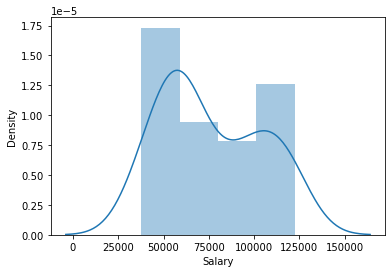

In [14]:
sns.distplot(sal['Salary'])

In [16]:
sal=sal.rename({'YearsExperience':'Exp'},axis=1)

C:\Users\mahesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Exp', ylabel='Density'>

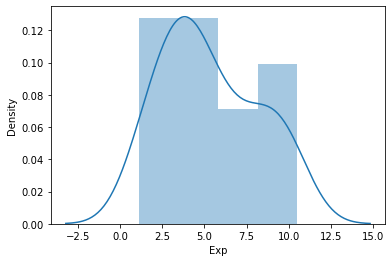

In [17]:
sns.distplot(sal['Exp'])

<AxesSubplot:xlabel='Exp', ylabel='Salary'>

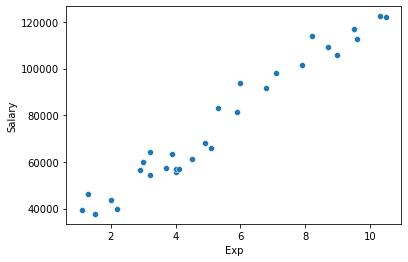

In [18]:
sns.scatterplot(x='Exp',y='Salary',data=sal)

In [19]:
sal.corr()

,Exp,Salary
Exp,1.000000,0.978242
Salary,0.978242,1.000000


In [20]:
# MultiCollinearity - High multicollinearit columns can be dropped
X = np.array(sal)
X


array([[1.10000e+00, 3.93430e+04],
       [1.30000e+00, 4.62050e+04],
       [1.50000e+00, 3.77310e+04],
       [2.00000e+00, 4.35250e+04],
       [2.20000e+00, 3.98910e+04],
       [2.90000e+00, 5.66420e+04],
       [3.00000e+00, 6.01500e+04],
       [3.20000e+00, 5.44450e+04],
       [3.20000e+00, 6.44450e+04],
       [3.70000e+00, 5.71890e+04],
       [3.90000e+00, 6.32180e+04],
       [4.00000e+00, 5.57940e+04],
       [4.00000e+00, 5.69570e+04],
       [4.10000e+00, 5.70810e+04],
       [4.50000e+00, 6.11110e+04],
       [4.90000e+00, 6.79380e+04],
       [5.10000e+00, 6.60290e+04],
       [5.30000e+00, 8.30880e+04],
       [5.90000e+00, 8.13630e+04],
       [6.00000e+00, 9.39400e+04],
       [6.80000e+00, 9.17380e+04],
       [7.10000e+00, 9.82730e+04],
       [7.90000e+00, 1.01302e+05],
       [8.20000e+00, 1.13812e+05],
       [8.70000e+00, 1.09431e+05],
       [9.00000e+00, 1.05582e+05],
       [9.50000e+00, 1.16969e+05],
       [9.60000e+00, 1.12635e+05],
       [1.03000e+01,

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif = [variance_inflation_factor(X,i) for i in range(X.shape[1]-1)]
print(vif)
X=pd.DataFrame()

[37.14597194848691]


## Normalizing data transformation

In [22]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [23]:
df_norm = norm_func(sal.iloc[:,:])

In [24]:
df_norm

,Exp,Salary
0,0.000000,0.019041
1,0.021277,0.100094
2,0.042553,0.000000
3,0.095745,0.068438
4,0.117021,0.025514
5,0.191489,0.223376
6,0.202128,0.264812
7,0.223404,0.197425
8,0.223404,0.315545
9,0.276596,0.229837


## Data Modelling

In [25]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~Exp",data =sal).fit()


<AxesSubplot:xlabel='Exp', ylabel='Salary'>

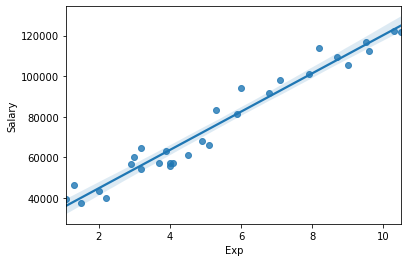

In [26]:
sns.regplot(x='Exp',y='Salary',data=sal)

In [27]:
#Coefficients
model.params


Intercept    25792.200199
Exp           9449.962321
dtype: float64

In [28]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)  

Intercept    11.346940
Exp          24.950094
dtype: float64 
 Intercept    5.511950e-12
Exp          1.143068e-20
dtype: float64


In [29]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

<AxesSubplot:>

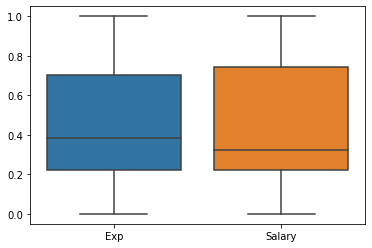

In [31]:
sns.boxplot(data=df_norm)

## Predicting New data

In [32]:
import pandas as pd

In [33]:
#Predict for 10 min sorting time 
newdata=pd.Series([ 1.5])

In [34]:
sal_pred=pd.DataFrame(newdata,columns=['Exp'])

In [35]:
ym=model.predict(sal_pred)

In [36]:
ym

0    39967.143681
dtype: float64